In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("Data/NIFTY-BANK-14-09-2022-to-14-09-2023.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,14-SEP-2022,40308.80,41626.90,40288.90,41405.4,218413793.0,8227.00
1,15-SEP-2022,41533.70,41840.15,41153.50,41209.2,245307055.0,6772.31
2,16-SEP-2022,40977.20,41162.50,40502.05,40776.8,244187210.0,8926.40
3,19-SEP-2022,40685.60,41184.25,40509.90,40904.4,206028623.0,5828.98
4,20-SEP-2022,41304.15,41677.65,41207.30,41468.3,175202873.0,5080.23


In [4]:
df1 = df.iloc[:, 0:5]
df1.head()

,Date,Open,High,Low,Close
0,14-SEP-2022,40308.80,41626.90,40288.90,41405.4
1,15-SEP-2022,41533.70,41840.15,41153.50,41209.2
2,16-SEP-2022,40977.20,41162.50,40502.05,40776.8
3,19-SEP-2022,40685.60,41184.25,40509.90,40904.4
4,20-SEP-2022,41304.15,41677.65,41207.30,41468.3


In [5]:
x = df1.loc[:, ['Date ']]  # features


In [7]:
# dti = pd.to_datetime(x,np.datetime64

In [8]:
from sklearn.linear_model import LinearRegression

# Training data
X = df1.loc[:, ['Open ']]  # features
y = df1.loc[:, 'Close ']  # target

In [9]:
# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [19]:
y_pred,y

(0      40305.428501
 1      41516.609842
 2      40966.342542
 3      40678.008409
 4      41289.630761
            ...     
 243    44368.655642
 244    44898.257018
 245    45281.071008
 246    45827.877507
 247    45388.405267
 Length: 248, dtype: float64,
 0      41405.40
 1      41209.20
 2      40776.80
 3      40904.40
 4      41468.30
          ...   
 243    44878.35
 244    45156.40
 245    45570.70
 246    45511.35
 247    45909.45
 Name: Close , Length: 248, dtype: float64)

In [ ]:
ax = y.plot(model)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

(37264.9065521932, 46661.40412936742, 37303.811721399055, 46700.30929857328)

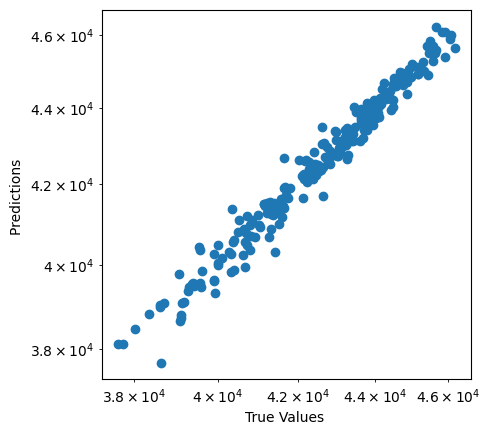

In [12]:
g=plt.scatter(y, y_pred)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

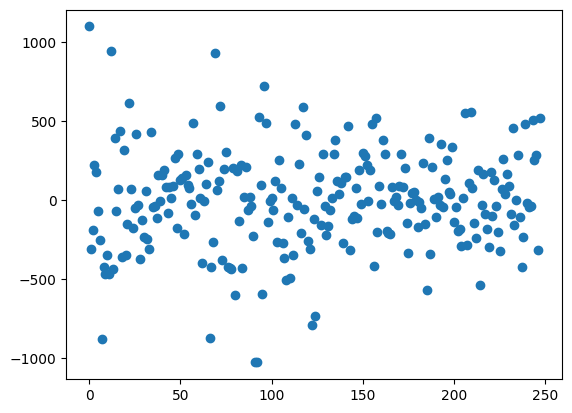

In [13]:
g=plt.plot(y - y_pred,marker='o',linestyle='')

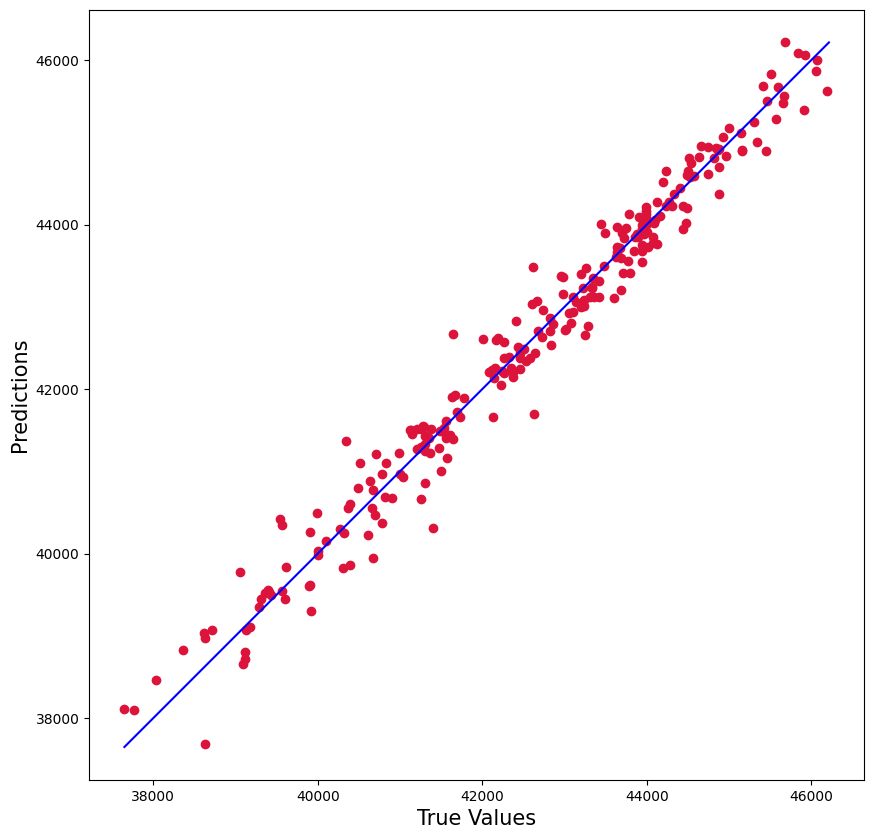

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(y, y_pred, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(y_pred), max(y))
p2 = min(min(y_pred), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [27]:
y_pre = model.predict([[46122]])
y_pre

C:\Users\shubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([46053.52170845])

In [29]:
model.score(X,y)

0.9731577000944871

In [25]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(model, X, y, scoring="accuracy", cv = 7))
mean_score = cross_val_score(model, X, y, scoring="accuracy", cv = 7).mean()
std_score = cross_val_score(model, X, y, scoring="accuracy", cv = 7).std()

print(mean_score)
print(std_score)

[nan nan nan nan nan nan nan]
nan
nan


C:\Users\shubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\shubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\shubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\shubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, 

In [30]:
from datetime import datetime

In [41]:
# Example with the standard date and time format
date_str = '14-SEP-2022'
date_format = '%d-%b-%Y'
date = datetime.strptime(date_str, date_format)
type(date)
date

datetime.datetime(2022, 9, 14, 0, 0)

In [42]:
df2 = df

In [47]:
df2.dtypes

Date                object
Open               float64
High               float64
Low                float64
Close              float64
Shares Traded      float64
Turnover (₹ Cr)    float64
dtype: object

In [48]:
df2['Date '] = pd.to_datetime(df2['Date '])

C:\Users\shubh\AppData\Local\Temp\ipykernel_17152\4014849664.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Date '] = pd.to_datetime(df2['Date '])


In [49]:
df2.dtypes

Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Shares Traded             float64
Turnover (₹ Cr)           float64
dtype: object

In [50]:
df2.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,2022-09-14,40308.80,41626.90,40288.90,41405.4,218413793.0,8227.00
1,2022-09-15,41533.70,41840.15,41153.50,41209.2,245307055.0,6772.31
2,2022-09-16,40977.20,41162.50,40502.05,40776.8,244187210.0,8926.40
3,2022-09-19,40685.60,41184.25,40509.90,40904.4,206028623.0,5828.98
4,2022-09-20,41304.15,41677.65,41207.30,41468.3,175202873.0,5080.23


In [56]:
df2['Time'] = np.arange(len(df2.index))
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Time
0,2022-09-14,40308.80,41626.90,40288.90,41405.4,218413793.0,8227.00,0
1,2022-09-15,41533.70,41840.15,41153.50,41209.2,245307055.0,6772.31,1
2,2022-09-16,40977.20,41162.50,40502.05,40776.8,244187210.0,8926.40,2
3,2022-09-19,40685.60,41184.25,40509.90,40904.4,206028623.0,5828.98,3
4,2022-09-20,41304.15,41677.65,41207.30,41468.3,175202873.0,5080.23,4


In [57]:
# Training data
X = df2.loc[:, ['Time']]  # features
y = df2.loc[:, 'Close ']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [58]:
X.dtypes

Time    int32
dtype: object

In [59]:
y_pred = pd.Series(model.predict(X), index=X.index)

In [61]:
y_pred,y

(0      40191.573990
 1      40210.661279
 2      40229.748568
 3      40248.835858
 4      40267.923147
            ...     
 243    44829.785321
 244    44848.872610
 245    44867.959899
 246    44887.047189
 247    44906.134478
 Length: 248, dtype: float64,
 0      41405.40
 1      41209.20
 2      40776.80
 3      40904.40
 4      41468.30
          ...   
 243    44878.35
 244    45156.40
 245    45570.70
 246    45511.35
 247    45909.45
 Name: Close , Length: 248, dtype: float64)

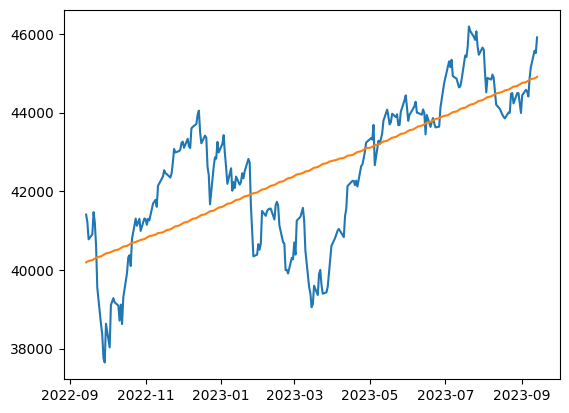

In [65]:
plt.plot(df2['Date '],y)
plt.plot(df2['Date '],y_pred)

In [78]:
date_str = "2023-09-16"
model.predict([[datetime.strptime(date_str, '%Y-%m-%d')]])

C:\Users\shubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


TypeError: unsupported operand type(s) for *: 'datetime.datetime' and 'float'